<a href="https://colab.research.google.com/github/locoblueog/locoblueog/blob/main/TMDL_2024_25_Assignment_1%2C_Qs_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

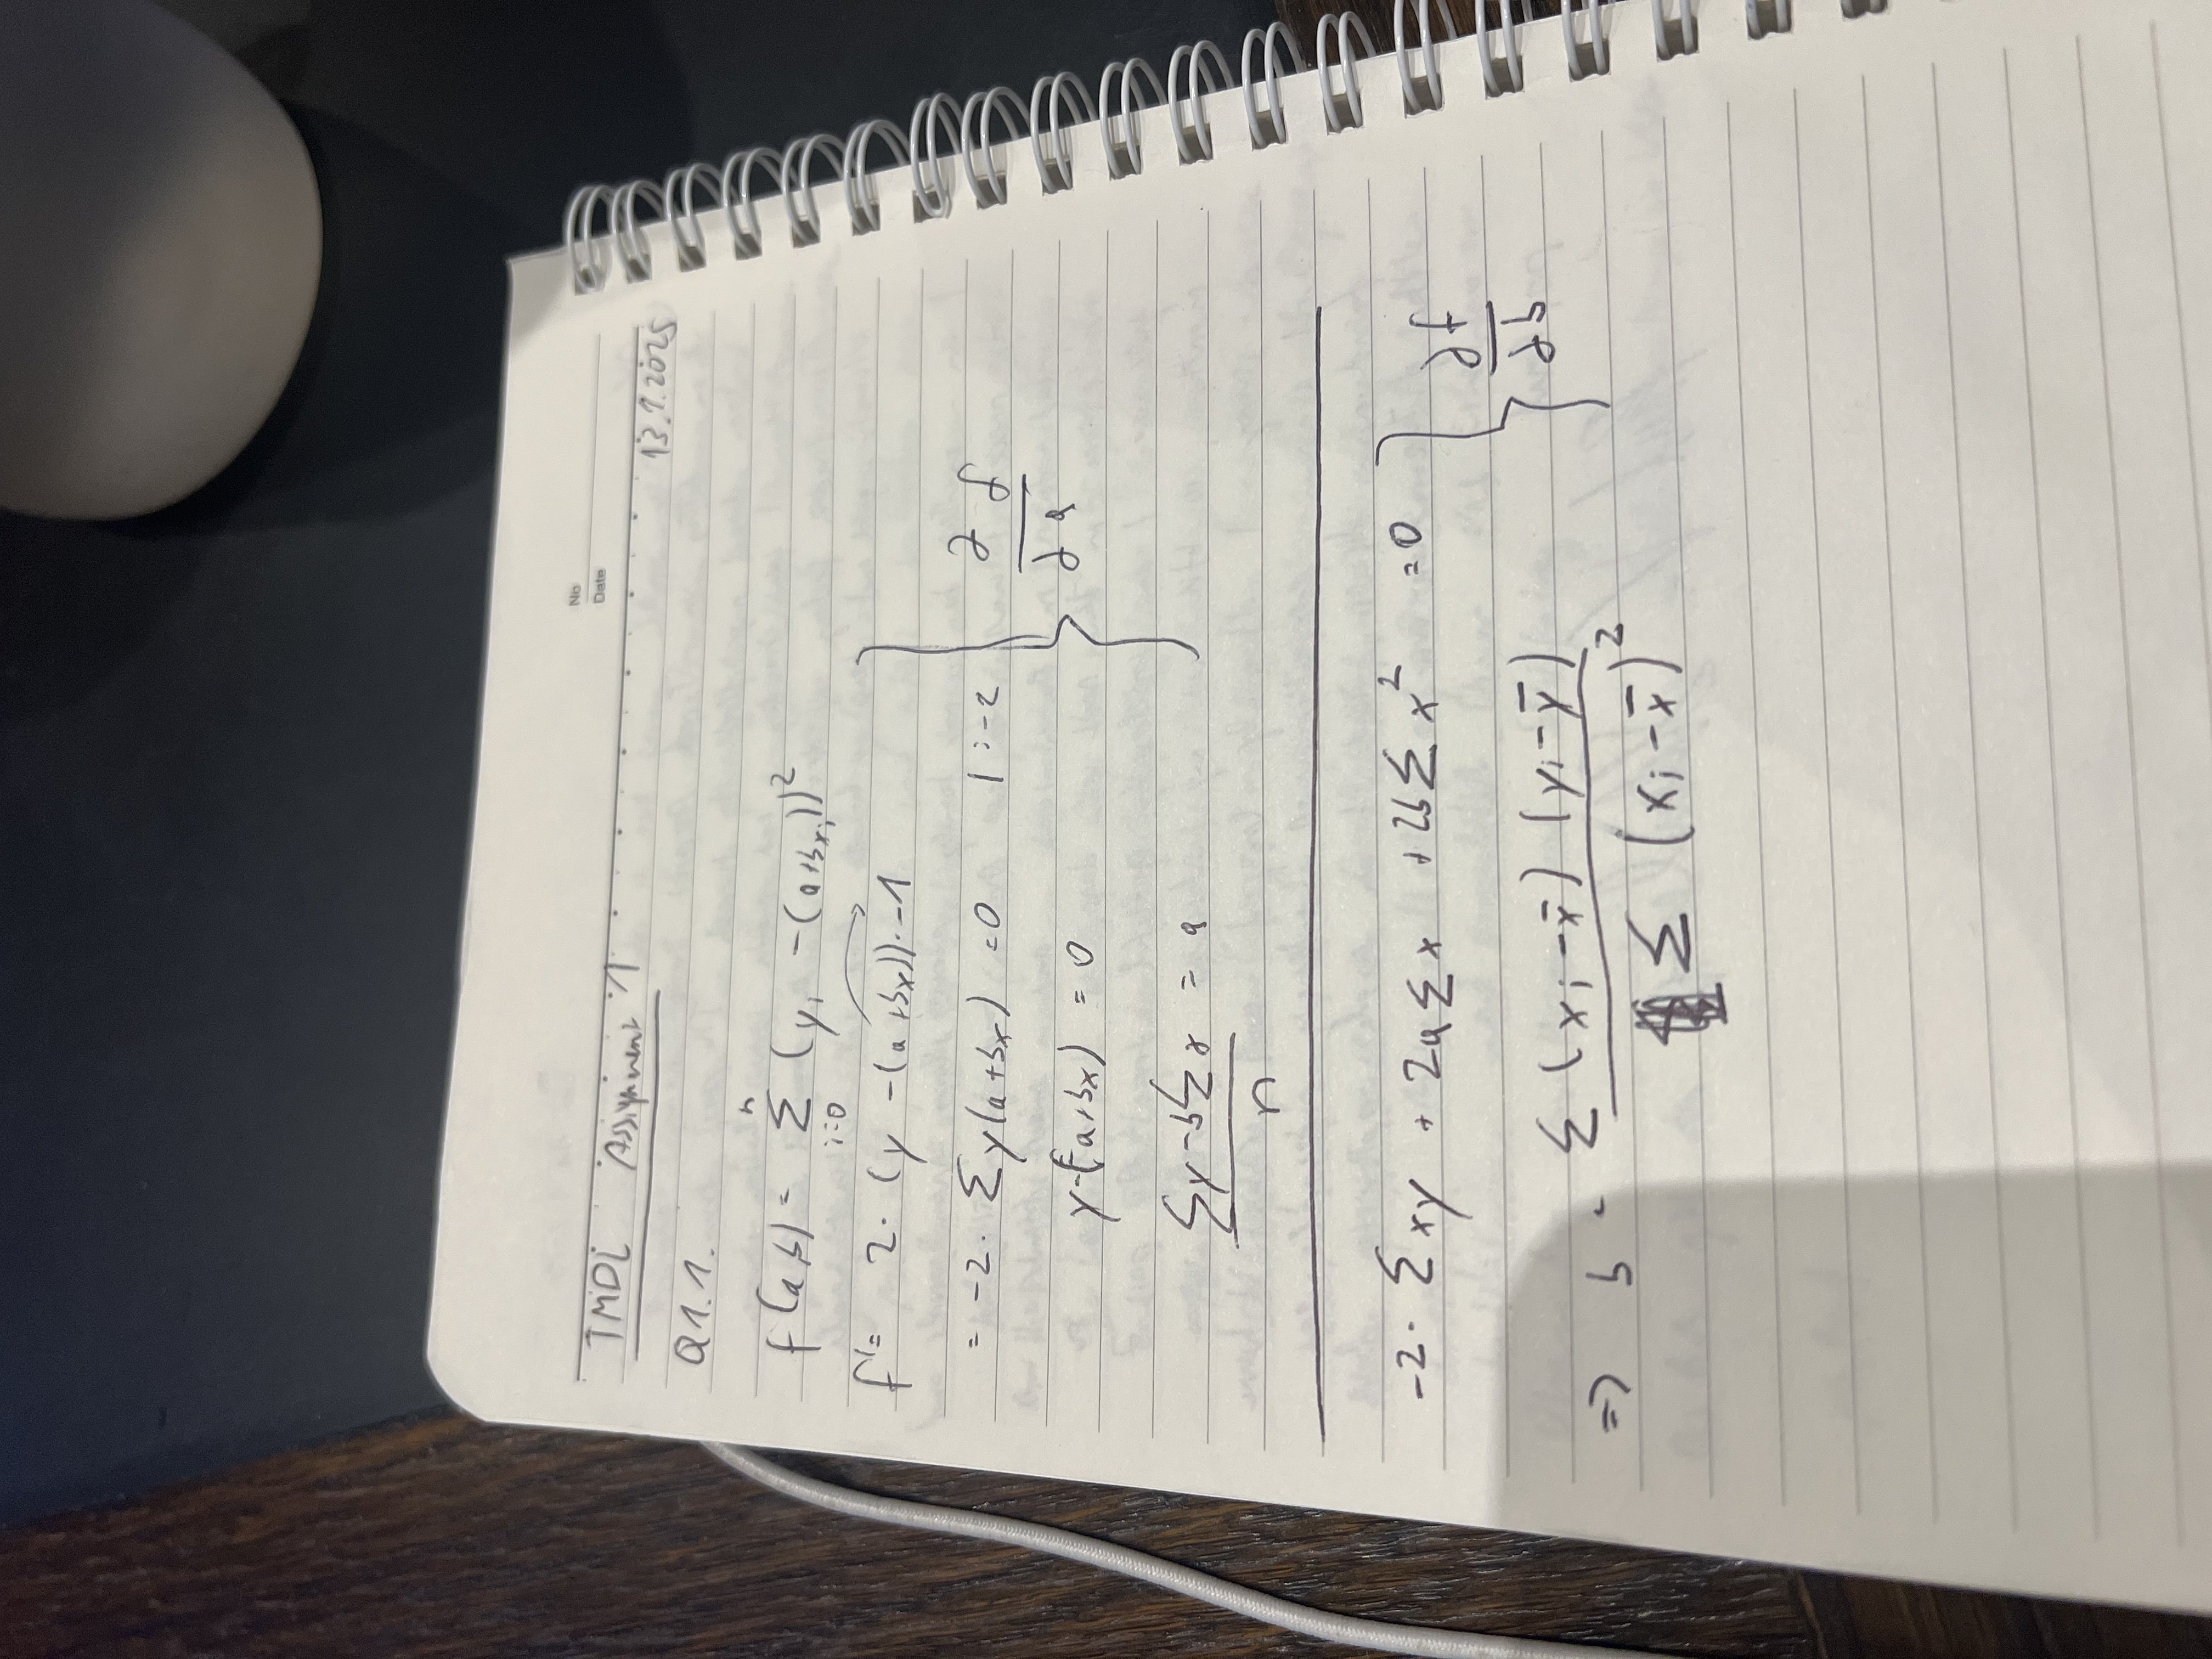

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

Yes, there is only one unique solution for a and b in standard linear regression, assuming the data is not perfectly collinear. This is because the loss function (sum of squared errors) is quadratic in both a and b, meaning it forms a convex surface. A convex function has a single global minimum, ensuring a unique solution. If the data points are not perfectly aligned or identical, there will always be a unique optimal pair of a and b. However, if the data is perfectly collinear (e.g., all xi values are the same), the problem becomes ill-posed, and no unique solution exists.

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

No, the solutions for a and b would not be different if you used mean squared error (MSE) instead of sum of squared errors (SSE). The only difference between MSE and SSE is a constant factor of 1/n, where n is the number of data points. Since this factor does not affect the location of the minimum, the optimal values for a and b remain the same. The MSE just normalizes the error by the number of data points, but it does not change the underlying solution.

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:

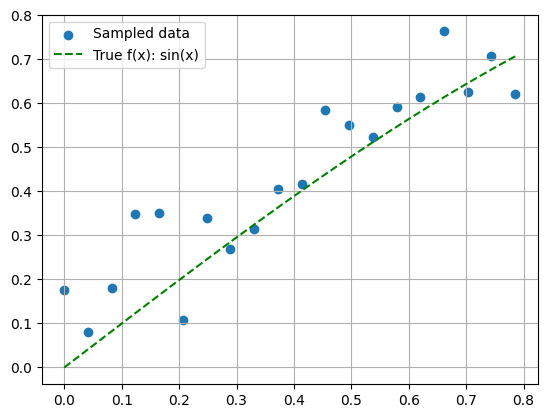

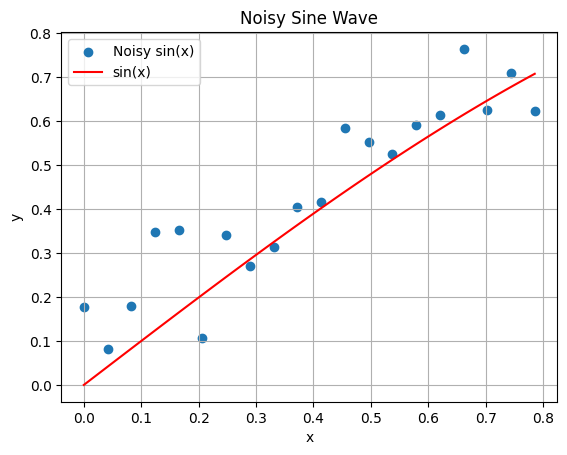

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def generate_sin(x, epsilon):
    noise = np.random.normal(0, epsilon, len(x))
    func = np.sin(x) + noise
    return func

n_samples = 20
epsilon = 0.1

# create noisy function
x = np.linspace(0, np.pi/4, n_samples)
y = generate_sin(x, epsilon)

# create true function
x_pure = np.linspace(0, np.pi/4, 100) # more points for smoother curve
y_pure = np.sin(x_pure)

# plot data, line
plt.scatter(x, y, label='Noisy sin(x)', marker='o')
plt.plot(x_pure, y_pure, label='sin(x)', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Noisy Sine Wave')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

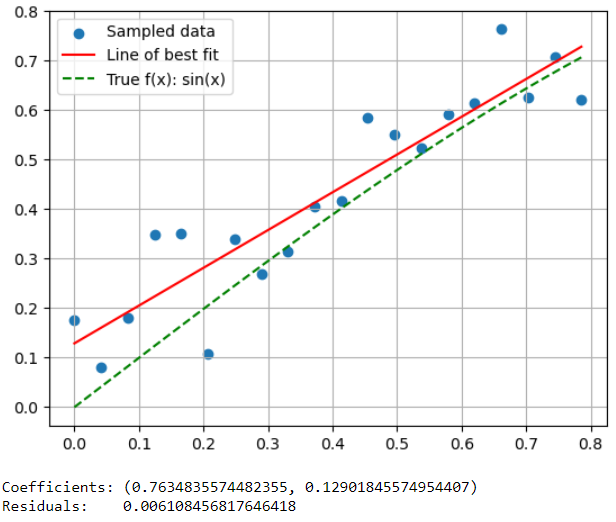

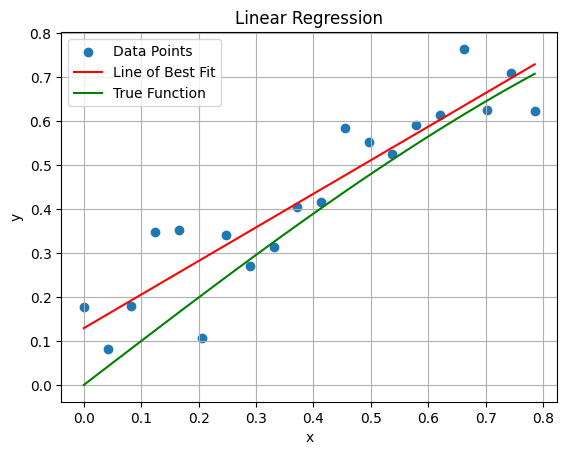

Coefficients: (0.12901845574954407, 0.7634835574482355)
Residuals:    0.12216913635292838


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # For reproducibility

def generate_sin(x, epsilon):
    noise = np.random.normal(0, epsilon, len(x))
    func = np.sin(x) + noise
    return func

n_samples = 20
epsilon = 0.1

# create noisy function
x = np.linspace(0, np.pi/4, n_samples)
y = generate_sin(x, epsilon)

# create true function
x_pure = np.linspace(0, np.pi/4, 100) # more points for smoother curve
y_pure = np.sin(x_pure)


def compute_sos(y_true, y_pred):
    sos = np.sum((y_true - y_pred)**2)
    return sos

def lin_reg(xs, ys):
    n = len(xs)
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)

    # Calculate b (slope)
    b_numerator = np.sum((xs - x_mean) * (ys - y_mean))
    b_denominator = np.sum((xs - x_mean)**2)
    b = b_numerator / b_denominator

    # Calculate a (intercept)
    a = y_mean - b * x_mean

    # Calculate predicted y values
    y_pred = b * xs + a

    # Calculate residuals (SSEs)
    res = compute_sos(ys, y_pred)

    return a, b, res


# Generate line of best fit
a, b, res = lin_reg(x, y) # Use the generated x and y data
x_line = np.linspace(min(x), max(x), 100)  # Use x for line of best fit range
y_best = b*x_line + a


# Plotting
plt.scatter(x, y, label="Data Points")  # Plot the generated data
plt.plot(x_line, y_best, color='red', label="Line of Best Fit")
plt.plot(x_pure, y_pure, color='green', label="True Function")  # Plot the true function

plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.show()

print("Coefficients:", (a, b))
print("Residuals:   ", res)


## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

In [ ]:
# TODO: use np polyfit here
b_np, a_np = ...
y_best_np = ...

# TODO: plot everything you need to

# print results
print("Coefficients:     ", (a, b))
print("Residuals:        ", res)
print("Coefficients (np):", (a_np, b_np))
print("Residuals (np):   ", res_np)

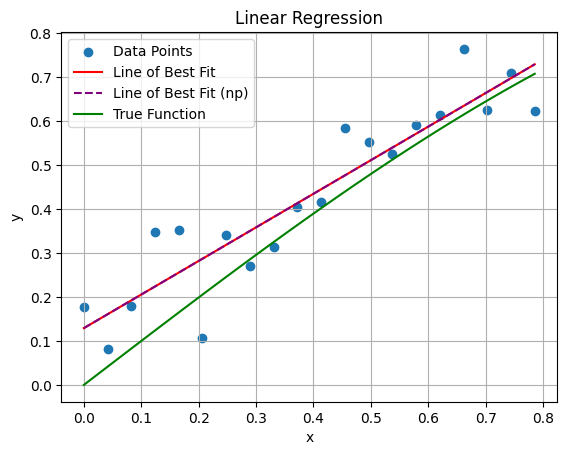

Coefficients:    (0.12901845574954407, 0.7634835574482355)
Residuals:       0.12216913635292838
Coefficients (np): (0.1290184557495442, 0.7634835574482354)
Residuals (np):    0.12216913635292836


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # For reproducibility

def generate_sin(x, epsilon):
    noise = np.random.normal(0, epsilon, len(x))
    func = np.sin(x) + noise
    return func

n_samples = 20
epsilon = 0.1

# create noisy function
x = np.linspace(0, np.pi/4, n_samples)
y = generate_sin(x, epsilon)

# create true function
x_pure = np.linspace(0, np.pi/4, 100) # more points for smoother curve
y_pure = np.sin(x_pure)


def compute_sos(y_true, y_pred):
    sos = np.sum((y_true - y_pred)**2)
    return sos

def lin_reg(xs, ys):
    n = len(xs)
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)

    # Calculate b (slope)
    b_numerator = np.sum((xs - x_mean) * (ys - y_mean))
    b_denominator = np.sum((xs - x_mean)**2)
    b = b_numerator / b_denominator

    # Calculate a (intercept)
    a = y_mean - b * x_mean

    # Calculate predicted y values
    y_pred = b * xs + a

    # Calculate residuals (SSEs)
    res = compute_sos(ys, y_pred)

    return a, b, res


# Generate line of best fit
a, b, res = lin_reg(x, y) # Use the generated x and y data
x_line = np.linspace(min(x), max(x), 100)  # Use x for line of best fit range
y_best = b*x_line + a

# Use np.polyfit
coeffs = np.polyfit(x, y, 1)
b_np, a_np = coeffs[0], coeffs[1]  # Note the order! polyfit returns coefficients in reverse order
y_best_np = b_np * x_line + a_np
res_np = compute_sos(y, np.polyval(coeffs, x))


# Plotting
plt.scatter(x, y, label="Data Points")  # Plot the generated data
plt.plot(x_line, y_best, color='red', label="Line of Best Fit")
plt.plot(x_line, y_best_np, color='purple', linestyle='--', label="Line of Best Fit (np)")
plt.plot(x_pure, y_pure, color='green', label="True Function")  # Plot the true function

plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.show()

print("Coefficients:   ", (a, b))
print("Residuals:      ", res)
print("Coefficients (np):", (a_np, b_np))
print("Residuals (np):   ", res_np)


## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

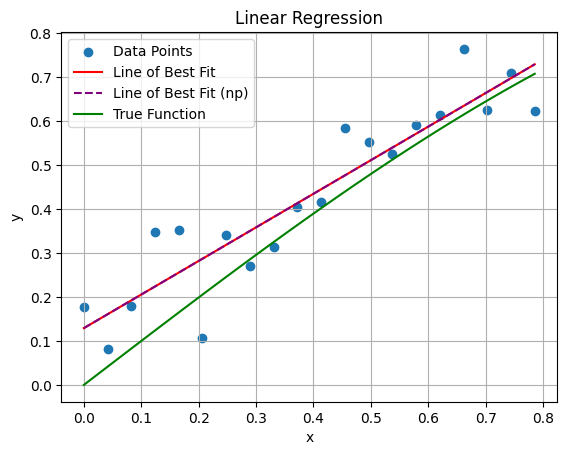

Coefficients:    (0.12901845574954407, 0.7634835574482355)
Residuals:       0.12216913635292838
Coefficients (np): (0.1290184557495442, 0.7634835574482354)
Residuals (np):    0.12216913635292836


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  # For reproducibility

def generate_sin(x, epsilon):
    noise = np.random.normal(0, epsilon, len(x))
    func = np.sin(x) + noise
    return func

n_samples = 20
epsilon = 0.1

# create noisy function
x = np.linspace(0, np.pi/4, n_samples)
y = generate_sin(x, epsilon)

# create true function
x_pure = np.linspace(0, np.pi/4, 100) # more points for smoother curve
y_pure = np.sin(x_pure)


def compute_sos(y_true, y_pred):
    sos = np.sum((y_true - y_pred)**2)
    return sos

def lin_reg(xs, ys):
    n = len(xs)
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)

    # Calculate b (slope)
    b_numerator = np.sum((xs - x_mean) * (ys - y_mean))
    b_denominator = np.sum((xs - x_mean)**2)
    b = b_numerator / b_denominator

    # Calculate a (intercept)
    a = y_mean - b * x_mean

    # Calculate predicted y values
    y_pred = b * xs + a

    # Calculate residuals (SSEs)
    res = compute_sos(ys, y_pred)

    return a, b, res


# Generate line of best fit
a, b, res = lin_reg(x, y) # Use the generated x and y data
x_line = np.linspace(min(x), max(x), 100)  # Use x for line of best fit range
y_best = b*x_line + a

# Use np.polyfit
coeffs = np.polyfit(x, y, 1)
b_np, a_np = coeffs[0], coeffs[1]  # Note the order! polyfit returns coefficients in reverse order
y_best_np = b_np * x_line + a_np
res_np = compute_sos(y, np.polyval(coeffs, x))


# Plotting
plt.scatter(x, y, label="Data Points")  # Plot the generated data
plt.plot(x_line, y_best, color='red', label="Line of Best Fit")
plt.plot(x_line, y_best_np, color='purple', linestyle='--', label="Line of Best Fit (np)")
plt.plot(x_pure, y_pure, color='green', label="True Function")  # Plot the true function

plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.show()

print("Coefficients:   ", (a, b))
print("Residuals:      ", res)
print("Coefficients (np):", (a_np, b_np))
print("Residuals (np):   ", res_np)


Which of the two losses *should* be better? Which is actually better? Why?

**Theoretically Better**:
In general, np.polyfit should give a better (lower) loss (Sum of Squared Errors - SOS or SSE) than the lin_reg function because np.polyfit is optimized, while lin_reg is a specific implementation of a simple linear regression (not as optimised).

**Actually Better**:
Both are very close, but np.polyfit fits better, as it handles numerical sample issues more robustly. Further, the SOS calculation is sensitive to the predicted y values, and np.polyfit has better predicted values (slightly)

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

In [ ]:
#Small n results in poor model performance, especially when paired with high ϵ, leading to both overfitting and high residuals. On the test set, the model struggles to generalize.
#Large n allows the model to fit the data better, and low ϵ reduces noise, resulting in better generalization to unseen data (test set).
#The model performs best with large n and low ϵ, and worst with small n and high ϵ.

#On the train set, the model tends to perform better because it has access to the data it was trained on. On the test set, performance is influenced by the model's ability to generalize to new, unseen data. When n is small or ϵ is high, the model may perform poorly on the test set due to overfitting or failure to learn the true pattern.

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

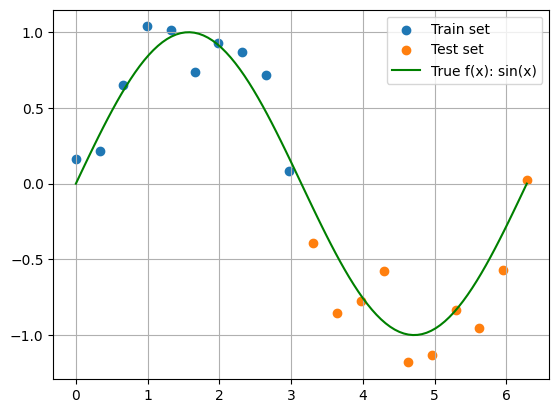

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the generate_sin function
def generate_sin(x, epsilon):
    noise = np.random.normal(0, epsilon, len(x))
    func = np.sin(x) + noise
    return func

# TODO: generate new data and plot
n_samples = 20
epsilon = 0.2

# Generate data
x = np.linspace(0, 2 * np.pi, n_samples)
y = generate_sin(x, epsilon)

# Split the data into train and test sets
# We'll take half of the points as the training set, the other half as the test set
train_size = n_samples // 2
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

# Generate the true function for comparison
x_pure = np.linspace(0, 2 * np.pi, 100)
y_pure = np.sin(x_pure)

# Plotting
plt.scatter(x_train, y_train, label="Train set")
plt.scatter(x_test, y_test, label="Test set")
plt.plot(x_pure, y_pure, label="True f(x): sin(x)", color='green')

plt.grid()
plt.legend()
plt.show()


## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

<ipython-input-10-f34c1c2e86ee>:36: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)
<ipython-input-10-f34c1c2e86ee>:36: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)
<ipython-input-10-f34c1c2e86ee>:36: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)
<ipython-input-10-f34c1c2e86ee>:36: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)
<ipython-input-10-f34c1c2e86ee>:36: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)
<ipython-input-10-f34c1c2e86ee>:36: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)
<ipython-input-10-f34c1c2e86ee>:36: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)
<ipython-input-10-f34c1c2e86ee>:36: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_tr

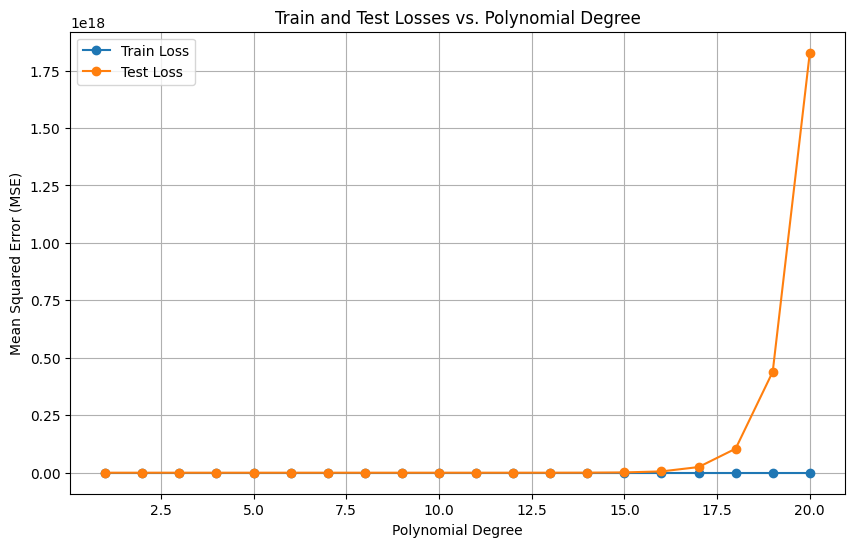

In [10]:
# TODO: your code here
import numpy as np
import matplotlib.pyplot as plt

# Define the generate_sin function (same as before)
def generate_sin(x, epsilon):
    noise = np.random.normal(0, epsilon, len(x))
    func = np.sin(x) + noise
    return func

# Generate data (same as before)
n_samples = 20
epsilon = 0.2
x = np.linspace(0, 2 * np.pi, n_samples)
y = generate_sin(x, epsilon)

# Split into train and test sets
train_size = n_samples // 2
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

# Function to compute Mean Squared Error (MSE)
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Prepare arrays to store results
train_losses = []
test_losses = []
coefficients = []

# Loop through polynomial degrees 1 to 20
for d in range(1, 21):
    # Fit the polynomial to the training data
    coeffs = np.polyfit(x_train, y_train, d)

    # Predict on train and test sets
    y_train_pred = np.polyval(coeffs, x_train)
    y_test_pred = np.polyval(coeffs, x_test)

    # Compute the losses (MSE)
    train_loss = compute_mse(y_train, y_train_pred)
    test_loss = compute_mse(y_test, y_test_pred)

    # Save the results
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    coefficients.append(coeffs)

# Plot the training and test losses as a function of polynomial degree
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, 21), test_losses, label="Test Loss", marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train and Test Losses vs. Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()


**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

This indicates that the matrix used in the least squares solution (by np.polyfit) is becoming ill-conditioned. The model is fitting the data in a numerically unstable way, potentially leading to overfitting and unreliable results.


## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

<ipython-input-11-9052da15e3d3>:37: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)
<ipython-input-11-9052da15e3d3>:37: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)


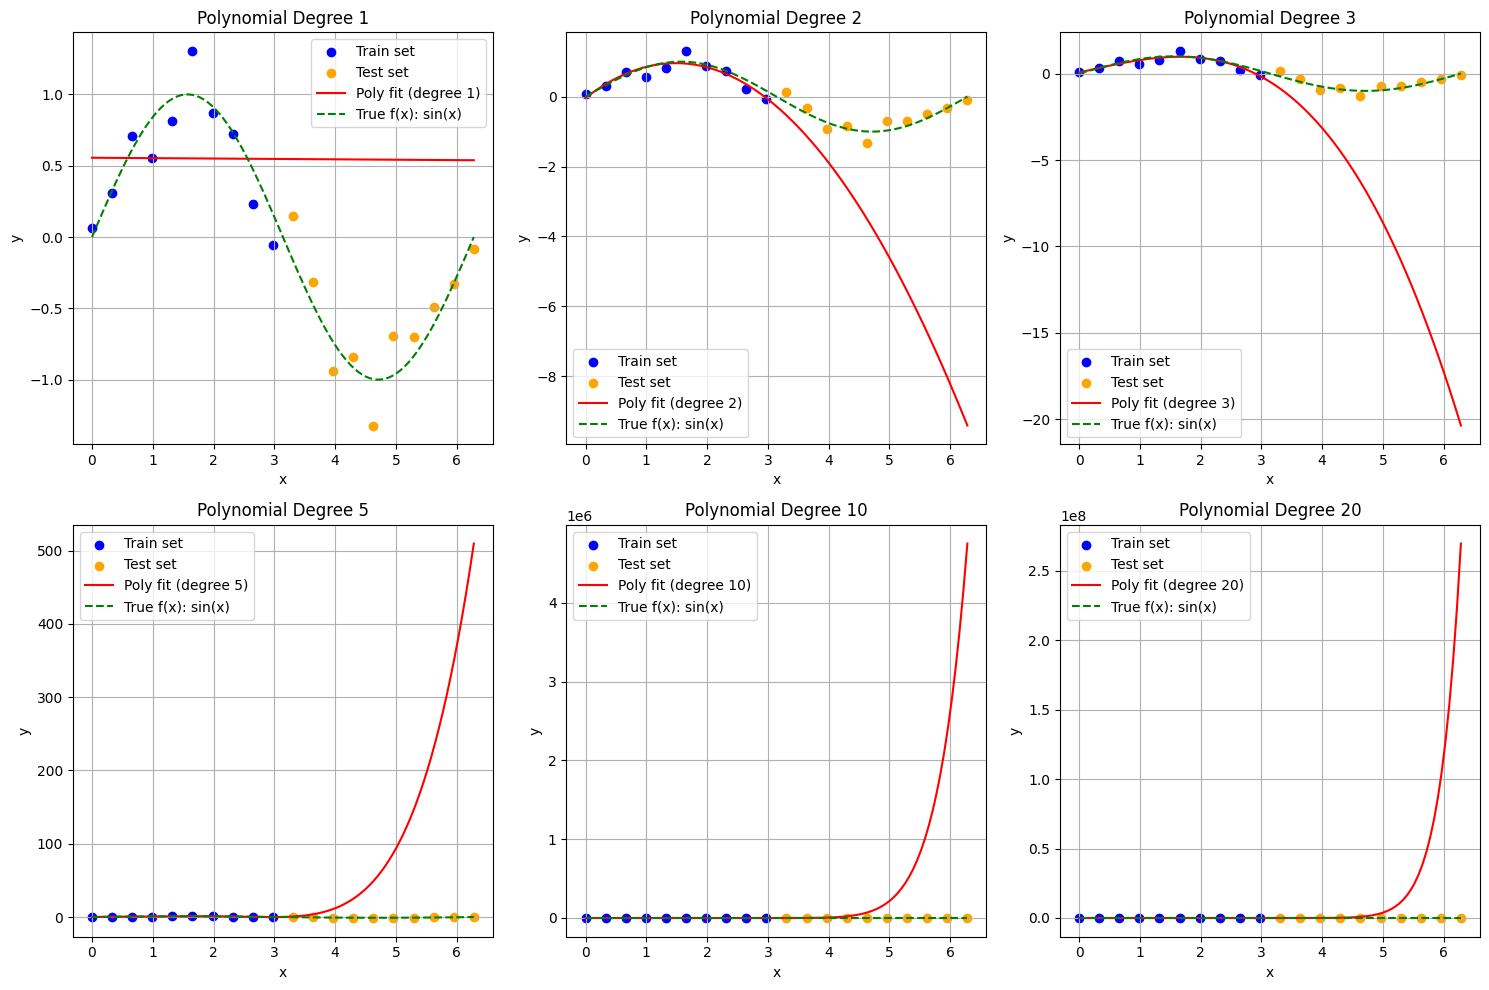

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the generate_sin function
def generate_sin(x, epsilon):
    noise = np.random.normal(0, epsilon, len(x))
    func = np.sin(x) + noise
    return func

# Generate data (same as before)
n_samples = 20
epsilon = 0.2
x = np.linspace(0, 2 * np.pi, n_samples)
y = generate_sin(x, epsilon)

# Split into train and test sets
train_size = n_samples // 2
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

# Generate the true function for comparison
x_pure = np.linspace(0, 2 * np.pi, 100)
y_pure = np.sin(x_pure)

# Polynomial degrees for plotting
degrees = [1, 2, 3, 5, 10, 20]

# Plot for each polynomial degree
plt.figure(figsize=(15, 10))

for i, d in enumerate(degrees, 1):
    plt.subplot(2, 3, i)  # Create a subplot for each degree

    # Fit the polynomial to the training data
    coeffs = np.polyfit(x_train, y_train, d)

    # Generate the polynomial values for the plot
    y_train_pred = np.polyval(coeffs, x_train)
    y_test_pred = np.polyval(coeffs, x_test)
    y_pure_pred = np.polyval(coeffs, x_pure)

    # Plot the results
    plt.scatter(x_train, y_train, label="Train set", color="blue")
    plt.scatter(x_test, y_test, label="Test set", color="orange")
    plt.plot(x_pure, y_pure_pred, label=f"Poly fit (degree {d})", color="red")
    plt.plot(x_pure, y_pure, label="True f(x): sin(x)", color="green", linestyle="--")

    plt.title(f"Polynomial Degree {d}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the generate_sin function
def generate_sin(x, epsilon):
    noise = np.random.normal(0, epsilon, len(x))
    func = np.sin(x) + noise
    return func

# Generate data (same as before)
n_samples = 20
epsilon = 0.2
x = np.linspace(0, 2 * np.pi, n_samples)
y = generate_sin(x, epsilon)

# Split into train and test sets
train_size = n_samples // 2
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

# Generate the true function for comparison
x_pure


array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

**Where do the polynomial models start to overfit? How can you tell?**
Overfitting begins when the polynomial degree becomes too high, causing the model to fit the training data too closely, including noise. You can tell by the test MSE increasing while the training MSE keeps decreasing as the degree grows, indicating the model is overly complex for the underlying data.

**What model fits the best to the training data? What model fits the best to the underlying function? Are they the same?**
The highest-degree polynomial fits the training data best but tends to overfit. The best model for the underlying function is usually a lower-degree polynomial (like degree 1 or 2), as it captures the general trend of the data without overfitting. They’re not the same because the best fit for the training data doesn’t always generalize well to unseen data.

**Try increasing the number of training points to n=200. When does overfitting start now?**
With more data, overfitting starts at a higher polynomial degree, as the model has more information to generalize better. However, it’s still possible to overfit with a very high-degree polynomial, even with more data.

**Does increasing the number of training points always allow for more flexible models? Why/why not?**
No, adding more data doesn’t always make the model more flexible. While more data helps reduce overfitting, a model’s capacity to capture complexity depends on its structure (e.g., linear vs. polynomial). Additionally, noisy data or overly complex models can still lead to overfitting, even with more data.*Add your text answer here*